In [ ]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore") # turn off warning

# Import and Check Dataset

In [ ]:
# import boston_housing dataset from scikit-learn library
from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
# print value of boston_housing dataset to understand what it contains
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Description of dataset
1. data: contains the information for various house
2. target: prices of the house
3. feature_names: names of the features
4. DESCR: describes the dataset

In [ ]:
# Check features or variables of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

> Dataset has 506 observations and 13 features. No Missing

> Response variable is "MEDV" as the median value of houses in $1,000 scale.

In [ ]:
# load dataset as data fram using pandas
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head(10) # view first 10 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


> MEDV response (or target) variable is missing.

In [ ]:
# create column for the response variable and add it to the dataframe
df["MEDV"] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


> MEDV response variable now added to the dataframe

# Data Preprocessing

In [ ]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

> there is no missing values

In [ ]:
df.info() # check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe() # summary of statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory Data Analysis

Since we are running a linear regression, we need to make sure that data is normally distributed

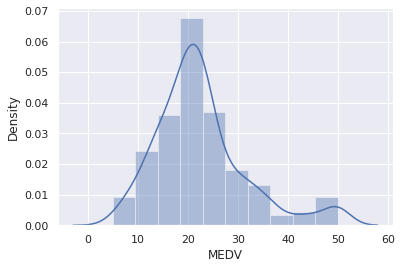

In [ ]:
# plot histogram for target variable
sns.distplot(df['MEDV'], bins = 10)


> Data looks normally distributed

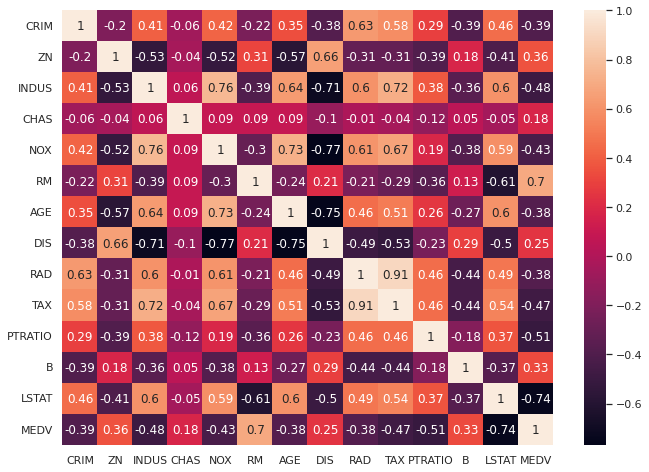

In [ ]:
# check for correlation
corr_matrix = df.corr().round(2) # compute for correlation matrix but round off to 2 decimal places

sns.set(rc={'figure.figsize':(11,8)}) # set graph size for all seaborn graphs
sns.heatmap(data = corr_matrix, annot = True) # graph correlation matrix with corr values

> on the plot, we can see that LSTAT (-0.74) and RM (0.7) have strong correlation with target variable MEDV. We can say that as LSTAT increases MEDV decreases and as RM increases MEDV increases.


# Training Models

## X and Y Arrays
Separate independent variables (as X) and target variable (as Y)

In [ ]:
X = df[['CRIM', 'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE','DIS','RAD','TAX', 'PTRATIO',	'B',	'LSTAT']] # predictors
Y = df[['MEDV']] # response variable

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Train & Test Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123) 
# split training and test dataset (70:30 percemt) using random seed number of 123


In [ ]:
# check dimension of original dataset
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)

# check dimension of split dataset
print("\n")
print("X_Train Shape: ",X_train.shape)
print("X_Test Shape: ",X_test.shape)
print("Y_Train Shape: ",Y_train.shape)
print("Y_Test Shape: ",Y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506, 1)


X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354, 1)
Y_Test Shape:  (152, 1)


## Standardization

In [ ]:
# scale the datasets because they have different variances as seen on data processing stage.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit on X_Train set only. Set parameters for scaler()
scaler.fit(X_train)

# apply transform to both train X and Y using X_train statistical properties
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating and Training the Model

### Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # assign function to lm

In [ ]:
lm.fit(X_train, Y_train) # run linear regression

LinearRegression()

#### Model Evaluation

In [ ]:
lm.intercept_ # model intercept

array([22.76186441])

In [ ]:
lm.coef_

array([[-0.9281326 ,  0.91733243,  0.51483834,  0.062497  , -1.6306264 ,
         3.42029822, -0.2106865 , -2.81921261,  2.3080726 , -2.16656895,
        -2.03787778,  0.5639928 , -3.50931538]])

In [ ]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# show coefficients for each feature
pd.DataFrame(lm.coef_.transpose(),X.columns,columns=['Coefficient'])

,Coefficient
CRIM,-0.928133
ZN,0.917332
INDUS,0.514838
CHAS,0.062497
NOX,-1.630626
RM,3.420298
AGE,-0.210687
DIS,-2.819213
RAD,2.308073
TAX,-2.166569


#### Predictions from our Model

In [ ]:
y_hat = lm.predict(X_test) # predict values to test dataset using linear model

In [ ]:
# check model performance in terms of error and goodness of fit
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_hat))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat)))

MAE: 3.6913626771162584
MSE: 28.405854810508238
RMSE: 5.329714327288869


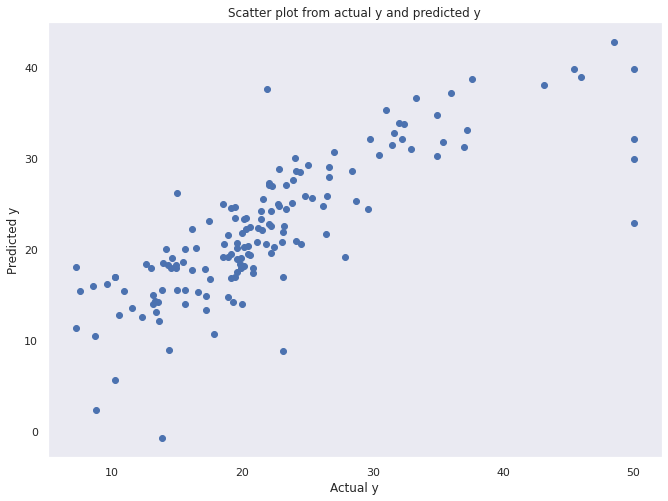

In [ ]:
plt.scatter(Y_test,y_hat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

### Linear Regression with SGDRegressor (Elastic Net)
 *Stochastic Gradient Descent (SGD)*

 (linear model 1)


In [ ]:
from sklearn.linear_model import SGDRegressor

n_iter = 1000 # number of times the model will run
lm1 = SGDRegressor(penalty = 'elasticnet', alpha = 0.05, max_iter = n_iter) # run SGD using elasticnet as penalty
lm1.fit(X_train, Y_train) # run model on training dataset
y_hat1 = lm1.predict(X_test) # predict values to test dataset using linear model 1

In [ ]:
y_hat1.shape

(152,)

#### Model Evaluation

In [ ]:
# check model performance in terms of error and goodness of fit
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat1))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat1)))

MAE: 3.6294457566125784
MSE: 29.048042425295847
RMSE: 5.389623588461058


#### Predictions from our Model

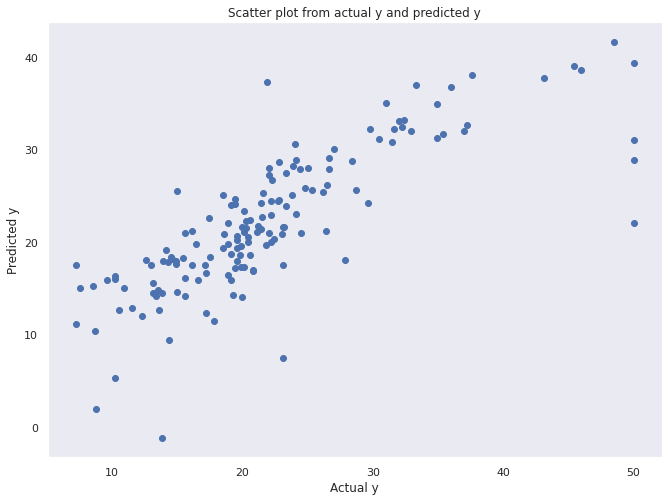

In [ ]:
plt.scatter(Y_test,y_hat1)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#### Cross validation

We will divide the training set into train and test set for cross validation. Will split the train dataset to 5 folds.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation using n_jobs = -1 to use all processors, CV =5 folds
scores_SGD_RMSE = cross_val_score(lm1, X_train, Y_train, scoring='r2', cv=5, n_jobs=-1)
scores_SGD_MSE = cross_val_score(lm1, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
scores_SGD_MAE = cross_val_score(lm1, X_train, Y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
from numpy import mean
print('RMSE:', mean(scores_SGD_RMSE))
print('MSE:', mean(scores_SGD_MSE))
print('MAE:', mean(scores_SGD_MAE))

RMSE: 0.7342972925695006
MSE: -22.61486738556699
MAE: -3.252866120248819


### Linear Regression with SGDRegressor (Ridge Regression)
 (linear model 2)

In [ ]:
from sklearn.linear_model import SGDRegressor

n_iter = 1000 # number of times the model will run
lm2 = SGDRegressor(penalty = 'l2', alpha = 0.05, max_iter = n_iter) # run SGD using ridge regression (l2) as penalty
lm2.fit(X_train, Y_train) # run model on training dataset
y_hat2 = lm2.predict(X_test) # predict values to test dataset using linear model 1

In [ ]:
y_hat2.shape

(152,)

#### Model Evaluation

In [ ]:
# check model performance in terms of error and goodness of fit
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat2))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat2)))

MAE: 3.6426601494848683
MSE: 29.34913613724873
RMSE: 5.417484299677179


#### Predictions from our Model

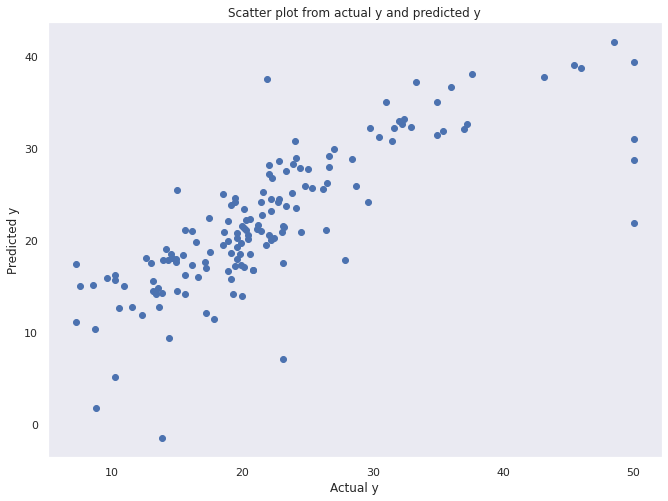

In [ ]:
plt.scatter(Y_test,y_hat2)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# cross validation using RMSE
scores_SGD_RMSE2 = cross_val_score(lm2, X_train, Y_train, scoring='r2', cv=5, n_jobs=-1)
scores_SGD_MSE2 = cross_val_score(lm2, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
scores_SGD_MAE2 = cross_val_score(lm2, X_train, Y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

from numpy import mean
print('RMSE:', mean(scores_SGD_RMSE2))
print('MSE:', mean(scores_SGD_MSE2))
print('MAE:', mean(scores_SGD_MAE2))

RMSE: 0.7351278884445746
MSE: -22.638285231187304
MAE: -3.239018068806992


# Summary

Model performance



In [ ]:
print("Simple Linear Regression:")

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat)))

Simple Linear Regression:
MAE: 3.6913626771162584
MSE: 28.405854810508238
RMSE: 5.329714327288869


In [ ]:

print("Elastic Net:")

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat1))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat1)), "\n")

print("Cross Validation using MSE:")

print('Mean:', mean(scores_SGD_MSE))
print('Standard Deviation:', np.std(scores_SGD_MSE))

Elastic Net:
MAE: 3.6294457566125784
MSE: 29.048042425295847
RMSE: 5.389623588461058 

Cross Validation using MSE:
Mean: -22.61486738556699
Standard Deviation: 5.4896140710186145


In [ ]:
print("Ridge Regression:")

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat2))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat2)), "\n")

print("Cross Validation using MSE:")

print('Mean:', mean(scores_SGD_MSE2))
print('Standard Deviation:', np.std(scores_SGD_MSE2))

Ridge Regression:
MAE: 3.6426601494848683
MSE: 29.34913613724873
RMSE: 5.417484299677179 

Cross Validation using MSE:
Mean: -22.6683370099571
Standard Deviation: 5.55805029628292


From the summary, overall the linear model performed better on Stochastic Gradient Descent Regressor with Elastic Net as the penalty. In terms or RMSE, it has the 2nd highest score at 5.38 and lowest MAE & MSE as 3.62 & 29.04.

In theory, SGDRegressor has the highest peformance of scoring for RMSE, and lowest MSE & MAE values.

From the cross validation result with 5 k-folds and scoring as negative MSE, Ridge Regression results are better with less over fitting compare to Elastic Net looking at the standard deviation.